In [57]:
import xgboost
import shap
import numpy as np
import joblib
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
f = lambda x:np.sin(2*np.pi*x[0])*np.sin(2*np.pi*(x[1]+x[2])/2)+x[3]+x[4]

In [3]:
m = 2000000 #instances (train+test)
n = 5
X = np.random.uniform(0,1,size=(m,n))

X[:,1] = X[:,2]+np.random.uniform(0,0.01,size=m)

y = np.array([f(x) for x in X])

In [9]:
#Half-for calibration, half-for validation

xgb = xgboost.XGBRegressor(n_estimators=1000,n_jobs=16,
                           early_stopping_rounds=5).fit(
    X[:m//2],y[:m//2],eval_set=[(X[m//2:],y[m//2:])],verbose=True)

[0]	validation_0-rmse:0.67453
[1]	validation_0-rmse:0.59254
[2]	validation_0-rmse:0.54751
[3]	validation_0-rmse:0.52390
[4]	validation_0-rmse:0.51185
[5]	validation_0-rmse:0.50579
[6]	validation_0-rmse:0.50277
[7]	validation_0-rmse:0.50054
[8]	validation_0-rmse:0.49980
[9]	validation_0-rmse:0.49229
[10]	validation_0-rmse:0.48727
[11]	validation_0-rmse:0.47563
[12]	validation_0-rmse:0.42274
[13]	validation_0-rmse:0.31916
[14]	validation_0-rmse:0.24180
[15]	validation_0-rmse:0.18806
[16]	validation_0-rmse:0.16138
[17]	validation_0-rmse:0.14229
[18]	validation_0-rmse:0.12630
[19]	validation_0-rmse:0.11518
[20]	validation_0-rmse:0.10229
[21]	validation_0-rmse:0.09881
[22]	validation_0-rmse:0.09182
[23]	validation_0-rmse:0.08596
[24]	validation_0-rmse:0.08346
[25]	validation_0-rmse:0.07961
[26]	validation_0-rmse:0.07827
[27]	validation_0-rmse:0.07522
[28]	validation_0-rmse:0.07314
[29]	validation_0-rmse:0.07228
[30]	validation_0-rmse:0.07167
[31]	validation_0-rmse:0.06966
[32]	validation_0-

[260]	validation_0-rmse:0.03126
[261]	validation_0-rmse:0.03124
[262]	validation_0-rmse:0.03122
[263]	validation_0-rmse:0.03120
[264]	validation_0-rmse:0.03119
[265]	validation_0-rmse:0.03118
[266]	validation_0-rmse:0.03116
[267]	validation_0-rmse:0.03115
[268]	validation_0-rmse:0.03108
[269]	validation_0-rmse:0.03107
[270]	validation_0-rmse:0.03104
[271]	validation_0-rmse:0.03103
[272]	validation_0-rmse:0.03101
[273]	validation_0-rmse:0.03100
[274]	validation_0-rmse:0.03098
[275]	validation_0-rmse:0.03096
[276]	validation_0-rmse:0.03096
[277]	validation_0-rmse:0.03095
[278]	validation_0-rmse:0.03092
[279]	validation_0-rmse:0.03091
[280]	validation_0-rmse:0.03090
[281]	validation_0-rmse:0.03087
[282]	validation_0-rmse:0.03084
[283]	validation_0-rmse:0.03077
[284]	validation_0-rmse:0.03069
[285]	validation_0-rmse:0.03068
[286]	validation_0-rmse:0.03064
[287]	validation_0-rmse:0.03062
[288]	validation_0-rmse:0.03061
[289]	validation_0-rmse:0.03060
[290]	validation_0-rmse:0.03059
[291]	va

[517]	validation_0-rmse:0.02436
[518]	validation_0-rmse:0.02435
[519]	validation_0-rmse:0.02433
[520]	validation_0-rmse:0.02431
[521]	validation_0-rmse:0.02431
[522]	validation_0-rmse:0.02430
[523]	validation_0-rmse:0.02430
[524]	validation_0-rmse:0.02428
[525]	validation_0-rmse:0.02427
[526]	validation_0-rmse:0.02426
[527]	validation_0-rmse:0.02426
[528]	validation_0-rmse:0.02426
[529]	validation_0-rmse:0.02425
[530]	validation_0-rmse:0.02423
[531]	validation_0-rmse:0.02421
[532]	validation_0-rmse:0.02420
[533]	validation_0-rmse:0.02419
[534]	validation_0-rmse:0.02416
[535]	validation_0-rmse:0.02414
[536]	validation_0-rmse:0.02412
[537]	validation_0-rmse:0.02412
[538]	validation_0-rmse:0.02411
[539]	validation_0-rmse:0.02411
[540]	validation_0-rmse:0.02411
[541]	validation_0-rmse:0.02410
[542]	validation_0-rmse:0.02410
[543]	validation_0-rmse:0.02410
[544]	validation_0-rmse:0.02409
[545]	validation_0-rmse:0.02407
[546]	validation_0-rmse:0.02405
[547]	validation_0-rmse:0.02404
[548]	va

[774]	validation_0-rmse:0.02157
[775]	validation_0-rmse:0.02157
[776]	validation_0-rmse:0.02155
[777]	validation_0-rmse:0.02154
[778]	validation_0-rmse:0.02153
[779]	validation_0-rmse:0.02153
[780]	validation_0-rmse:0.02153
[781]	validation_0-rmse:0.02152
[782]	validation_0-rmse:0.02149
[783]	validation_0-rmse:0.02149
[784]	validation_0-rmse:0.02149
[785]	validation_0-rmse:0.02148
[786]	validation_0-rmse:0.02148
[787]	validation_0-rmse:0.02148
[788]	validation_0-rmse:0.02148
[789]	validation_0-rmse:0.02148
[790]	validation_0-rmse:0.02148
[791]	validation_0-rmse:0.02147
[792]	validation_0-rmse:0.02147
[793]	validation_0-rmse:0.02146
[794]	validation_0-rmse:0.02144
[795]	validation_0-rmse:0.02143
[796]	validation_0-rmse:0.02139
[797]	validation_0-rmse:0.02136
[798]	validation_0-rmse:0.02135
[799]	validation_0-rmse:0.02133
[800]	validation_0-rmse:0.02133
[801]	validation_0-rmse:0.02133
[802]	validation_0-rmse:0.02130
[803]	validation_0-rmse:0.02129
[804]	validation_0-rmse:0.02129
[805]	va

In [10]:
explainer = shap.TreeExplainer(xgb)

In [17]:
#SHAP values computed on the validation set
PHI = explainer.shap_interaction_values(X[m//2:])

In [21]:
p = explainer.shap_values(X[m//2:]).reshape((len(X[m//2:]),1,n))

In [23]:
joblib.dump({'PHI':PHI,'p':p,'X':X,'y':y,'xgb':xgb,'explainer':explainer},
            'model_dump.joblib',compress=2)

['model_dump.joblib']

In [ ]:
#Load the joblib to skip the computation time.

#dump = joblib.load('model_dump.joblib')

In [ ]:
#The SHAP value can be splitted in 1000 chunks of 1000 istances each. To every chunk we can associate a p-value.

In [27]:
m_test = m//2
n_chunk = 1000

p = p.reshape((n_chunk,m_test//n_chunk,1,n))
PHI = PHI.reshape((n_chunk,m_test//n_chunk,n,n))

In [37]:
pphi = p*PHI

In [43]:
mean = pphi.mean(axis=1)*(m_test//n_chunk)
std = np.sqrt(pphi.var(axis=1)*(m_test//n_chunk))

In [53]:
pvalue = st.norm.cdf(0,mean,std)

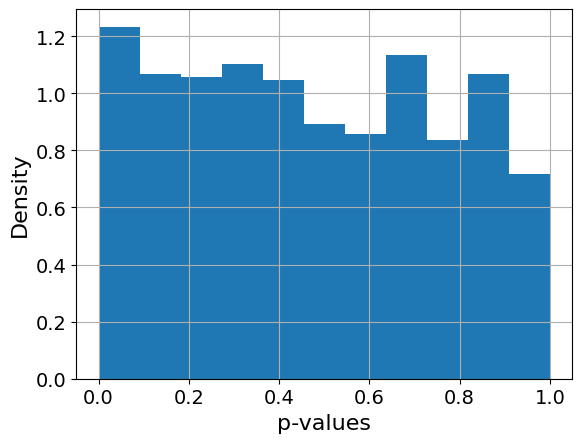

In [114]:
i,j = 0,3 #Change this values to check other pairs
plt.hist(pvalue[:,i,j],bins='auto',density=True);
plt.xlabel('p-values',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()

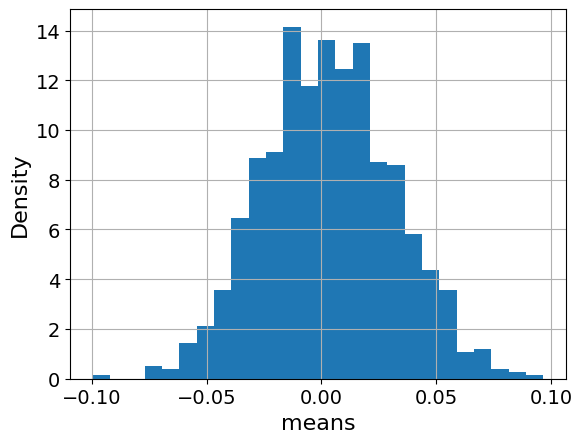

In [115]:
# Looking at the mean and the std of the fitted normal we can see that even when the p-value is significant
#The related conficence interval should be very narrow and close to zero.
plt.hist(mean[:,i,j],bins='auto',density=True);
plt.xlabel('means',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()

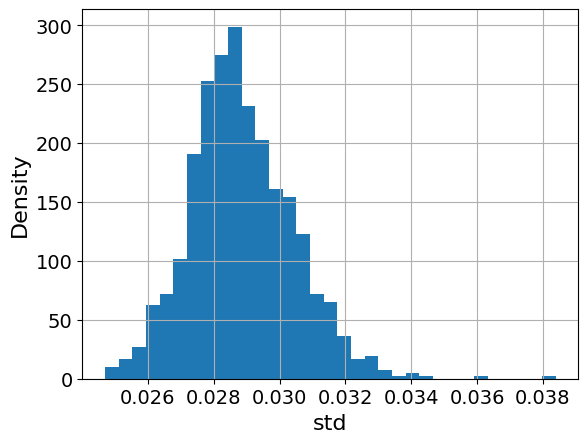

In [116]:
plt.hist(std[:,i,j],bins='auto',density=True);
plt.xlabel('std',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()

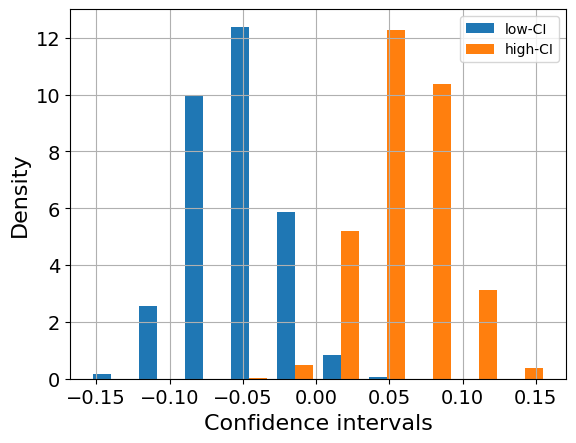

In [117]:
#Maybe confidence intervals are more appropriate

mins,maxs= st.norm.interval(0.95,mean[:,i,j],std[:,i,j])
plt.hist([mins,maxs],label=['low-CI','high-CI'],density=True);
plt.legend()
plt.xlabel('Confidence intervals',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()